In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

headers = ["Url", "Category","Position", "Title", "Location","Amount_Raised", "Goal", "Number_of_Donators",
           "Length_of_Fundraising", "FB_Shares", "GFM_hearts", "Text", "Latitude", "Longitude"]

df = pd.read_csv('GFM_data.csv', sep = '\t', encoding = 'latin1')


df

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donators,Length_of_Fundraising,FB_Shares,GFM_hearts,Text,Latitude,Longitude
0,0,https://www.gofundme.com/3ctqm-medical-bills-f...,Medical,0,92 Yr old Man Brutally Attacked.,"LOS ANGELES, CA",327345.0,"15,000","12,167",1 month,26k,12k,Rodolfo Rodriguez needs your help today! 92 Yr...,34.052234,-118.243685
1,1,https://www.gofundme.com/olivia-stoy-bone-marr...,Medical,0,Olivia Stoy:Transplant & Liv it up!,"ASHLEY, IN",316261.0,1.0M,"5,598",3 months,12k,5.7k,Thomas Stoy needs your help today! Olivia Stoy...,41.527272,-85.065523
2,2,https://www.gofundme.com/autologous-Tcell-Tran...,Medical,1,AUTOLOGOUS T CELL TRANSPLANT,"STATEN ISLAND, NY",241125.0,"250,000",841,2 months,1.8k,836,Philip Defonte needs your help today! AUTOLOGO...,40.579532,-74.150201
3,3,https://www.gofundme.com/a-chance-of-rebirth,Medical,1,A chance of rebirth,"DUBLIN, CA",237424.0,"225,000","4,708",1 month,9.7k,4.7k,Sriram Kanniah needs your help today! A chance...,37.702152,-121.935792
4,4,https://www.gofundme.com/teamclaire,Medical,1,Claire Wineland Needs Our Help,"GARDEN GROVE, CA",236590.0,"225,000","8,393",2 months,6.4k,8.9k,Melissa Yeager needs your help today! Claire W...,33.774269,-117.937995
5,5,https://www.gofundme.com/hannas-emergency-canc...,Medical,2,Hanna's Emergency Cancer Surgery,"SPRING LAKE, NJ",224718.0,"250,000","2,705",5 months,3.7k,2.7k,Hanna Wilt needs your help today! Hanna's Emer...,40.153448,-74.028193
6,6,https://www.gofundme.com/brayden-belden,Medical,2,Brayden Belden Recovery Fund,"LAGUNA BEACH, CA",214147.0,"275,000","2,700",6 months,10k,2.7k,Matt Belden needs your help today! Brayden Bel...,33.542719,-117.785357
7,7,https://www.gofundme.com/jacobburyrecovery,Medical,2,Jacob Bury Recovery Fund,"TACOMA, WA",209490.0,"250,000",924,1 month,2.8k,949,Jacob Bury needs your help today! Jacob Bury R...,47.252877,-122.444291
8,8,https://www.gofundme.com/Victoria-Gouletas-Wes...,Medical,3,When the Unthinkable Happens,"WESTPORT, CT",206726.0,"250,000","2,052",5 months,3.3k,2.0k,Victoria Gouletas needs your help today! When ...,41.141472,-73.357905
9,9,https://www.gofundme.com/fight-like-the-averys,Medical,3,Fight like the Averys,"REDONDO BEACH, CA",195413.0,"200,000","2,445",1 month,6.0k,2.5k,Duncan Avery needs your help today! Fight like...,33.849182,-118.388408


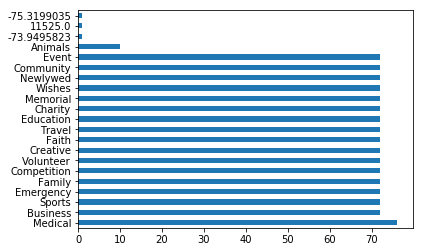

In [6]:
df['Category'].value_counts().plot(kind='barh')

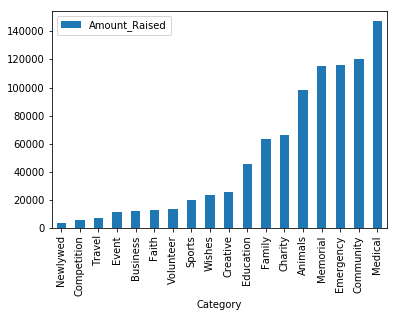

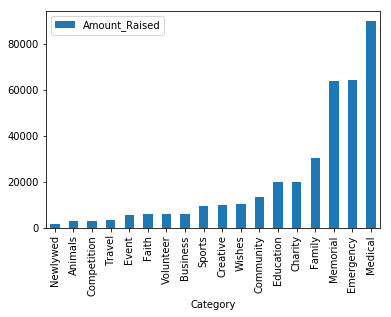

In [46]:
"""df2 = df.groupby(['Category']).sum()
df3 = df.assign(Duration = df.get('Length_of_Fundraising').str.split())
df3 = df3.dropna()
duration_months = []
for i in df3.get('Duration'):
    if i[1] == 'days' or i[1] == 'day':
        i[0] = str(int(i[0])/30)
    elif i[1] == 'year' or i[1] == 'years':
        i[0] = str(int(i[0])*12)
    del i[1]
    duration_months.append(float("".join(i[0])))
df3 = df3.assign(Duration_months = duration_months)
#print(df3.get('Amount_Raised').max())
df11 = df3.groupby(['Category']).mean().sort_values(by = 'Amount_Raised')
df12 = df3.groupby(['Category']).min().sort_values(by = 'Amount_Raised')
df11.plot(y = 'Amount_Raised', kind = 'bar')
df12.plot(y = 'Amount_Raised', kind = 'bar')"""

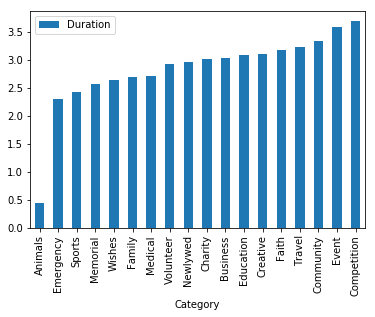

In [34]:
#Duration clean
def helper_duration(y):
    if y[1] == 'days' or y[1] == 'day':
        y[0] = str(int(y[0])/30)
    elif y[1] == 'year' or y[1] == 'years':
        y[0] = str(int(y[0])*12)
    del y[1]
    return float(y[0])
d2 = df.assign(Duration = df.get('Length_of_Fundraising').str.split())
d2 = d2.dropna()
d2 = d2.assign(Duration= d2.get('Duration').apply(helper_duration))
d2.groupby('Category').mean().sort_values(by = 'Duration').plot(y = 'Duration', kind = 'bar')



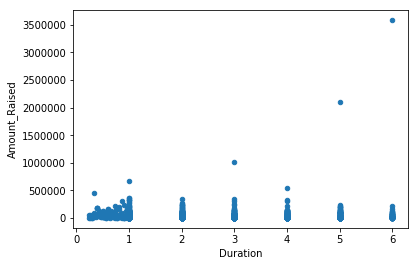

In [35]:
d2.plot.scatter(x = 'Duration', y = 'Amount_Raised')

In [ ]:
#Shares/Likes Cleaner


117000.0


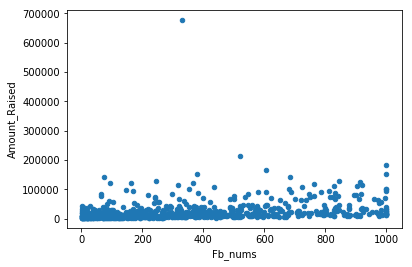

In [5]:
df4 = df.assign(Fb = df.get('FB_Shares'))
df4 = df4.dropna()
fb_nums = []
for i in df4.get('Fb'):
    if 'k' in i:
        i = i.replace('k', '')
        i = float(i)*1000
    else:
        i = float(i)
    fb_nums.append(i)
df4 = df4.assign(Fb_nums = fb_nums)
print(df4.get('Fb_nums').max())
df4[df4.get('Fb_nums') <=1000].plot.scatter(x = 'Fb_nums', y = 'Amount_Raised')

44000.0


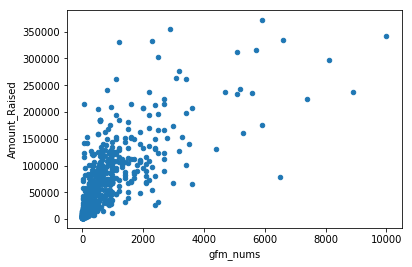

In [6]:
df5 = df.assign(Gfm = df.get('GFM_hearts'))
Gfm_nums = []
df5 = df5.dropna()
for i in df5.get('Gfm'):
    if 'k' in i:
        i = i.replace('k', '')
        i = float(i)*1000
    else:
        i = float(i)
    Gfm_nums.append(i)
df5 = df5.assign(gfm_nums = Gfm_nums)
print(df5.get('gfm_nums').max())
#df5.get('Gfm')
df10 = df5[df5.get('gfm_nums') <=10000]
df11 = df10[df10.get('Amount_Raised')<=500000]
df11.plot.scatter(x = 'gfm_nums', y = 'Amount_Raised')

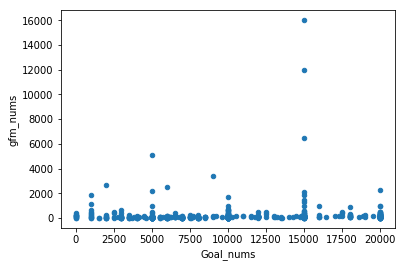

In [33]:
df6 = df5.assign(goal_n = df.get('Goal'))
goal_nums = []
df6 = df6.dropna()
for i in df6.get('goal_n'):
    if 'k' in i:
        i = i.replace('k', '')
        i = float(i)*1000
    elif 'M' in i:
        i = i.replace('M', '')
        i = float(i)*1000000
    elif ',' in i:
        i = i.replace(',','')
        i = float(i)
    else:
        i = float(i)
    goal_nums.append(i)
donators = []
for i in df6.get('Number_of_Donators'):
    if 'k' in i:
        i = i.replace('k', '')
        i = float(i)*1000
    elif 'M' in i:
        i = i.replace('M', '')
        i = float(i)*1000000
    elif ',' in i:
        i = i.replace(',','')
        i = float(i)
    else:
        i = float(i)
    donators.append(i)
df6 = df6.assign(Goal_nums = goal_nums, Donators = donators)
#print(df5.get('Goal_nums').max())
#df6.get('Number_of_Donators')
df7 = df6[df6.get('Goal_nums') <= 20000]
df7.plot.scatter(x = 'Goal_nums', y = 'gfm_nums', )

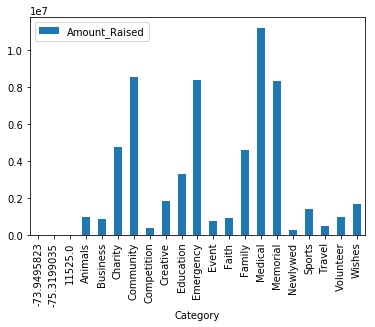

In [8]:
df9 = df.groupby('Category').sum()
df10 = df9.assign(Average_amount = df10.get('Amount_Raised')/ )
df9.plot(y = 'Amount_Raised', kind = 'bar')

In [ ]:
import geopandas
import geoplot

world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)